In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable

import noise
import model_opt
import algo_GD
import helper


In [26]:
gauss = pd.read_csv("exp_result/gauss_noise/gauss_noise_last_w  2020-07-03 17:34:18.992302.csv")[["iqr","w_0","w_1"]].sort_values(['iqr'])
gauss
gauss_noise = gauss.values.T

,iqr,w_0,w_1
5218,1.312160,0.435429,0.187464
1382,1.316027,0.444644,0.195313
7750,1.316116,0.457119,0.204802
6678,1.325802,0.427945,0.179314
1862,1.327565,0.457213,0.204394
...,...,...,...
2863,411.728213,-1.399030,1.009758
3814,412.321199,0.523126,1.215653
4468,413.006006,0.927577,0.773858
780,413.562455,0.594381,0.673145


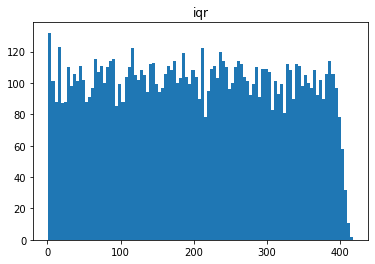

In [65]:
plt.hist(gauss_noise[0],bins=100)
plt.title("iqr")
plt.show()

In [59]:
print("Divergence_rate {}".format(1 - gauss["w_0"].count() / len(gauss)))

Divergence_rate 0.0010999999999999899


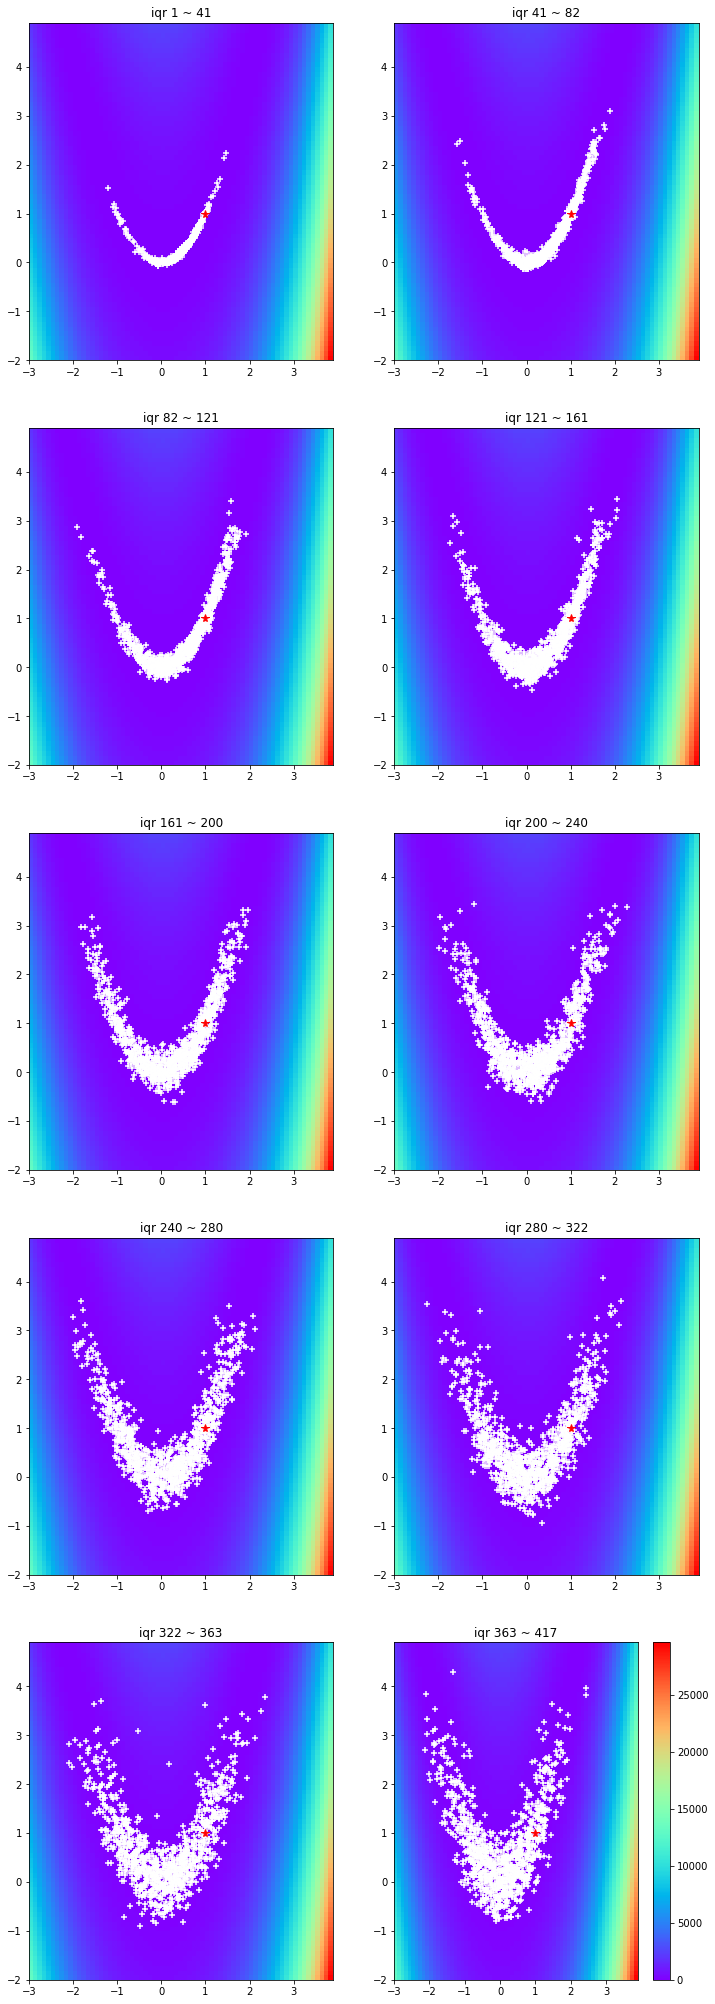

In [60]:
gauss_noise
f = model_opt.RosenBrock()
w_star = f.w_star

x_min = -3
x_max = 4
y_min = -2
y_max = 5
xvals = np.arange(x_min, x_max, 0.1)
yvals = np.arange(y_min, y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])
separate = 10
fig, axes = plt.subplots(int(separate/2),2,  figsize=(12,36))
for i in range(int(separate/2)):
    for j in range(2):
        fig_num = i * 2 + j
        result = gauss_noise[1:,fig_num*1000:999+fig_num*1000]
        iqr_min = int(gauss_noise[0,fig_num*1000])
        iqr_max = int(gauss_noise[0,999+fig_num*1000])
        axes[i][j].set_title("iqr {} ~ {}".format(iqr_min,iqr_max))
        axes[i][j].pcolor(X, Y, Z,cmap=plt.cm.rainbow)
        axes[i][j].scatter(*result,c="w",marker="+")
        axes[i][j].plot(*w_star, 'r*', markersize=8)

norm = colors.Normalize(vmin=Z.min(),vmax=Z.max())
mappable = ScalarMappable(cmap=plt.cm.rainbow,norm=norm)
fig.colorbar(mappable)

In [101]:
lognormal = pd.read_csv("exp_result/lognormal_noise/lognormal_noise_last_w2020-07-07 21:07:24.872086.csv")[["iqr","w_0","w_1"]].sort_values(['iqr'])
lognormal
lognormal_noise = lognormal.values.T

In [102]:
# 10000サンプル中wが発散してしまった率
print("Divergence_rate {}".format(1 - lognormal["w_0"].count() / len(gauss)))

Divergence_rate 0.06599999999999995


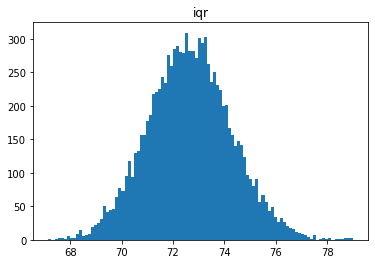

In [103]:
# 10000サンプル中iqrのヒストグラム
plt.hist(lognormal["iqr"],bins=100)
plt.title("iqr")
plt.show()


Text(0.5, 1.0, 'iqr 72.62791792281833 ~ 73.04873657220796')

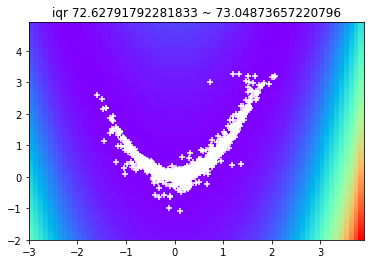

In [107]:
x_min = -3
x_max = 4
y_min = -2
y_max = 5

min = 5000
max = 6000
lognormal_noise_part = lognormal_noise[1:,min:max]
iqr_min = lognormal_noise[0,min]
iqr_max = lognormal_noise[0,max]
xvals = np.arange(x_min, x_max, 0.1)
yvals = np.arange(y_min, y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])
plt.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
plt.scatter(*lognormal_noise_part,c="w",marker="+")
plt.title("iqr {} ~ {}".format(iqr_min,iqr_max))

In [113]:

pareto = pd.read_csv("exp_result/pareto_noise/pareto_noise10000_last_w2020-07-09 20:56:23.267025.csv")[["iqr","w_0","w_1"]].sort_values(['iqr'])
pareto
pareto_noise = pareto.values.T

In [114]:
# 10000サンプル中wが発散してしまった率
print("Divergence_rate {}".format(1 - pareto["w_0"].count() / len(gauss)))

Divergence_rate 0.15790000000000004


/Users/naoki/.local/share/virtualenvs/ML-LMvAiov7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/naoki/.local/share/virtualenvs/ML-LMvAiov7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0, flags=flags)


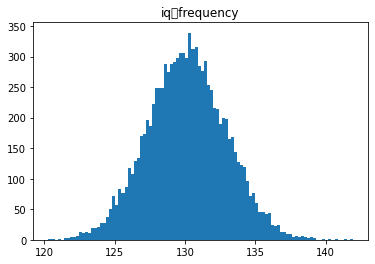

In [115]:
# 10000サンプル中iqrのヒストグラム
plt.hist(pareto["iqr"],bins=100)
plt.title("iq　frequency")
plt.show()

Text(0.5, 1.0, 'iqr 130.12623731484985 ~ 130.80032543238192')

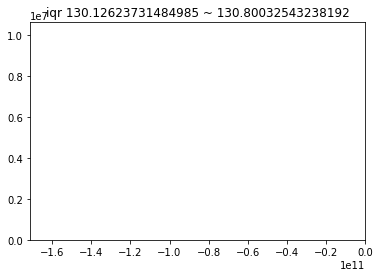

In [116]:
# :TODO 大きすぎるwが紛れ込んでいるのでその部分はnanに変更する

x_min = -3
x_max = 4
y_min = -2
y_max = 5

min = 5000
max = 6000
pareto_noise_part = pareto_noise[1:,min:max]
iqr_min = pareto_noise[0,min]
iqr_max = pareto_noise[0,max]
xvals = np.arange(x_min, x_max, 0.1)
yvals = np.arange(y_min, y_max, 0.1)
X, Y = np.meshgrid(xvals, yvals)
Z = f.f_opt([X,Y])
plt.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
plt.scatter(*pareto_noise_part,c="w",marker="+")
plt.title("iqr {} ~ {}".format(iqr_min,iqr_max))

/Users/naoki/.local/share/virtualenvs/ML-LMvAiov7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


(array([1898, 5678]),)

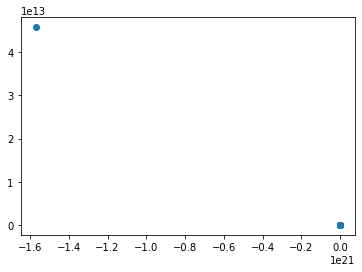

In [124]:
plt.scatter(*pareto_noise[1:])
np.where(pareto_noise[1] < -10000000)